In [1]:
from pathlib import Path
from rdkit import Chem
from iotbx.data_manager import DataManager
import numpy as np
import sys
from tqdm.notebook import tqdm
sys.path.append("../PhenixML/")

from phenixml.fragmentation.fragments import MolContainer, Fragment
from phenixml.fragmentation.fragmenters import AngleFragmenter, MoleculeFragmenter
from phenixml.fragmentation.display import FragmentDisplay
from phenixml.featurizers.fragments.fingerprints import MorganFeaturizer, RDKFingerprint

import logging
logger= logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [2]:
# get molecules
mol_dir = "data/GeoParsing/geostd_passed"
containers = MolContainer.from_folder(mol_dir,max_files=1000)

In [3]:
# Fragment the molecules
fragmenter = MoleculeFragmenter()
fragments = fragmenter(containers)

In [4]:
# Featurize the fragments
featurizer = RDKFingerprint()
features = featurizer.featurize(fragments,progress=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 199.83it/s]


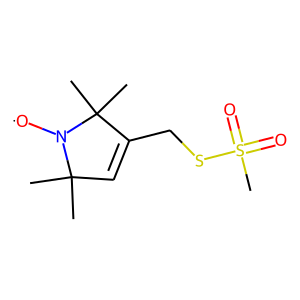

In [5]:
# Generate a new query molecule
query_container = MolContainer.from_smiles("CC1(C=C(C(N1[O])(C)C)CSS(=O)(=O)C)C")
query_fragment = query_container.full_fragment
query_fragment.show()

In [6]:
# Get a query feature
query_feature = featurizer(query_container)

In [7]:
features.shape

(1000, 2048)

In [8]:
display = FragmentDisplay()

In [9]:
from phenixml.fragments.nn_fragments import FragmentKNN
knn = FragmentKNN(fragments,features)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
nbrs = knn.query(query_feature)

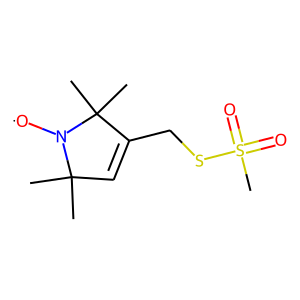

In [11]:
query_container.show()

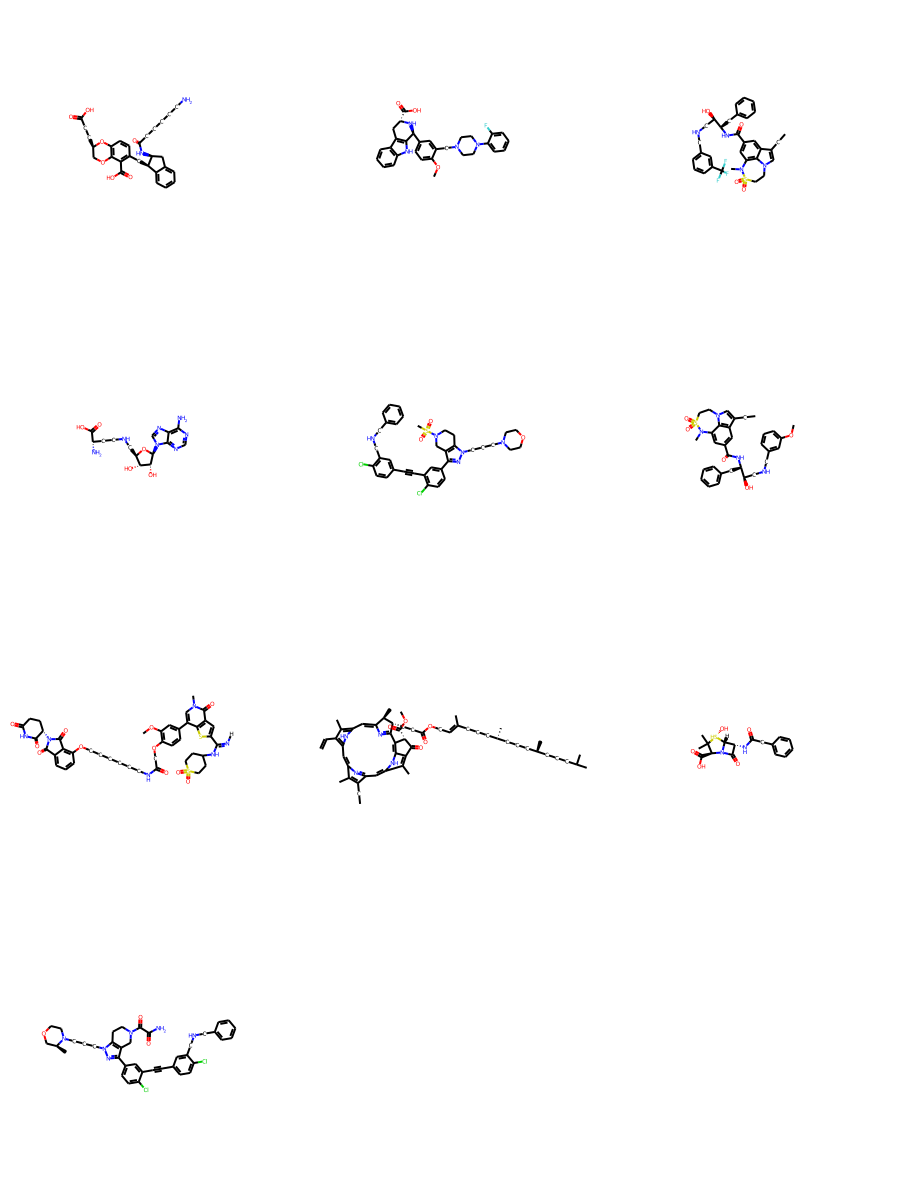

In [12]:
display(nbrs)

In [13]:
mol = query_container.rdkit_mol

In [14]:
np.array(Chem.RDKFingerprint(mol,fromAtoms=[0,1,2]))

array([0, 0, 0, ..., 0, 0, 1])